In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nepse.csv to nepse.csv


In [32]:
df=pd.read_csv("nepse.csv")
print(df.shape)
df = df.sort_index(ascending=False, axis=0)
df = df.reset_index()
df = df.drop("index", axis = 1)
df.head()

(1680, 2)


,Date,Index
0,2014-02-02,775.92
1,2014-02-03,769.51
2,2014-02-04,774.91
3,2014-02-05,781.38
4,2014-02-06,785.78


In [33]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [34]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training = scaler.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(scaled_training[i-60:i, 0])
    y_train.append(scaled_training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [35]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 7s 91ms/step - loss: 0.0536
Epoch 2/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0123
Epoch 3/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0089
Epoch 4/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0084
Epoch 5/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0067
Epoch 6/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0065
Epoch 7/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0058
Epoch 8/100
24/24 [==============================] - 2s 91ms/step - loss: 0.0064
Epoch 9/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0062
Epoch 10/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0055
Epoch 11/100
24/24 [==============================] - 2s 88ms/step - loss: 0.0050
Epoch 12/100
24/24 [==============================] - 2s 89ms/step - loss: 0.0046
Epoch 13/100
24/24 [=====

In [36]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 940):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(880, 60, 1)


In [37]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [16]:
predicted_stock_price.shape

(880, 1)

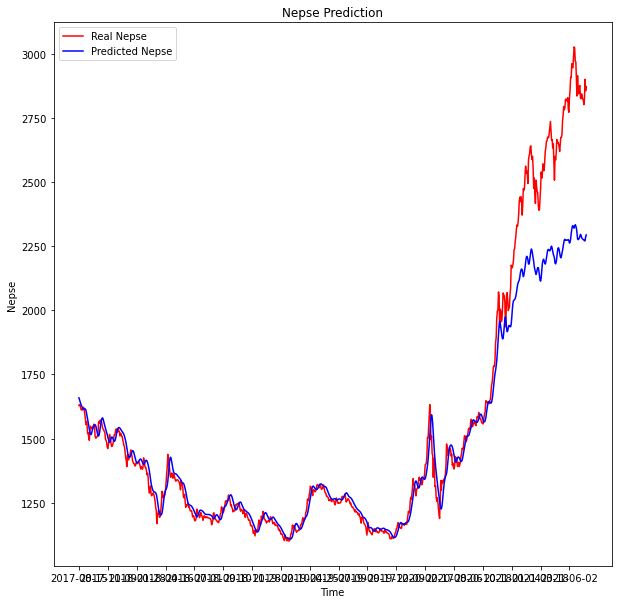

In [40]:
# Visualising the results
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real Nepse")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Nepse")
plt.xticks(np.arange(0,880,50))
plt.title('Nepse Prediction')
plt.xlabel('Time')
plt.ylabel('Nepse')
plt.legend()
plt.show()